Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Head (m)')

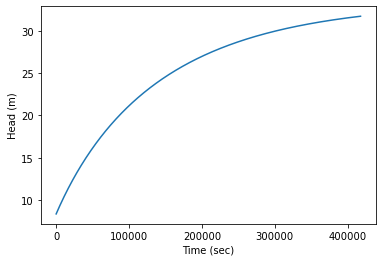

In [5]:

#import functions we need
%pylab inline
from scipy.integrate import odeint

#Define parameters
L=1000. #m
D_H = 1. #m
f = 0.1
A_R = 5000. #m^2
C_f = 1 + f*L/D_H 
A_c = pi*D_H/4. # m^2
R_i = 1.# m^3/s
R_f = 2.# m^3/s
g =9.8

#Set up analytical solution


#Define the derivative as a function
def Q(h):
    return A_c * sqrt(2*g*h/C_f)

def dh_dt(h, t, R):
    thisQ = Q(h)
    return (R - thisQ)/A_R

#Set up arrays for variables (time)
tau_res = A_R*C_f*R_f/(2.*g*A_c**2)
t_end = tau_res*5.
t = linspace(0, t_end, 500)
h_i = (R_i/A_c)**2*C_f/(2.*g)

#Solve using odeint
h = odeint(dh_dt, h_i, t, args=(R_f,))

#Plot the solution
plot(t, h)
xlabel('Time (sec)')
ylabel('Head (m)')

In [3]:

#import functions we need
%pylab 
from scipy.integrate import odeint

#Define parameters
L=1000. #m
D_H = 1. #m
f = 0.1
A_R1 = 5000. #m^2
A_R2 = 50. #m^2

C_f = 1 + f*L/D_H 
A_c = pi*D_H/4. # m^2
g =9.8
omega = 1.

#Define the derivative as a function
def Q(dh):
    return A_c * sqrt(2*g*dh/C_f)

def R(t):
    return sin(omega*t) + 1

def dh_dt(h, t):
    h1 = h[0]
    h2 = h[1]
    this_R = R(t) 
    Q1 = Q(h1-h2)
    Q2 = Q(h2)
    dh1_dt = (R(t) - Q1)/A_R1
    dh2_dt = (Q1 - Q2)/A_R2
    return [dh1_dt, dh2_dt]

t_end = 50000
t = linspace(0, t_end, 500)

h1_i = 0.
h2_i = 0.
#Solve using odeint
h = odeint(dh_dt, [h1_i, h2_i], t)

#Plot the solution
plot(t, h)
xlabel('Time (sec)')
ylabel('Head (m)')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Head (m)')